In [156]:
# Handwritten digits classification using neural network

In [157]:
''''first we will classify handwritten digits 
using a simple neural network which has only input and output layers.
We will than add a hidden layer and see how the performance of the model improves'''

"'first we will classify handwritten digits \nusing a simple neural network which has only input and output layers.\nWe will than add a hidden layer and see how the performance of the model improves"

In [158]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [159]:
# Load Handwritten digits dataset into (X_train, y_train) , (X_test, y_test)
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [160]:
len(X_train) # we have 60000 images

60000

In [161]:
len(X_test) # we have 10000 images

10000

In [162]:
X_train[0].shape # each sample is a 28X28 image

(28, 28)

In [163]:
# black -> close to 0 
# white -> close to 255
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

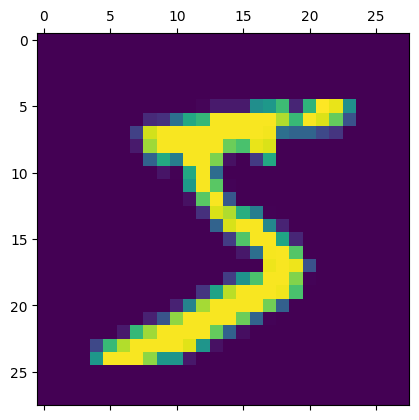

In [164]:
#plotting first sample.
plt.matshow(X_train[0])

In [165]:
# target will will 0 to 9
# this is because our dataset contains hand written images between 0 to 9.
y_train[0]

np.uint8(5)

In [166]:
y_train.shape

(60000,)

In [167]:
X_train.shape


(60000, 28, 28)

In [ ]:
#scaling is very important to make array values 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# flattening array to 1D
# we are only flattening X and not y because is already a simple array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [170]:
X_train_flattened.shape

(60000, 784)

In [171]:
X_test_flattened.shape

(10000, 784)

In [172]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [173]:
#Very simple neural network with no hidden layers

In [ ]:
#Sequential means, iam having a stack of layers neural network.
# dense means all neurons are in one layer are connected with neurons on 2nd layer.
#input is 784 ie 28*28
#output is 10 ie, 0 10 9 target digits
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') #input and output layer
])
#storing NN in a model, them compiling it
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #lossfunction
              metrics=['accuracy'])
#epochs is no. of iteration NN is running training on model
#passing y_train as unflattend , because it is a simple array. 
model.fit(X_train_flattened, y_train, epochs=5) #training

# ideal loss is 0.5 to 0.2

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8765 - loss: 0.4768
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.3044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9236 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9260 - loss: 0.2667


In [ ]:
# evaluating accuaracy and loss on a test dataset
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9255 - loss: 0.2660


[0.2660157382488251, 0.9254999756813049]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# this has 10 values because truth values are 0 to 9, ie we are comapring y_predicted (X_test) to truth(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.3779719e-06, 7.5815701e-11, 9.1204929e-06, 5.2218591e-03,
       4.6922736e-07, 1.9987214e-05, 2.1382282e-10, 9.9428999e-01,
       1.8556859e-05, 4.3567971e-04], dtype=float32)

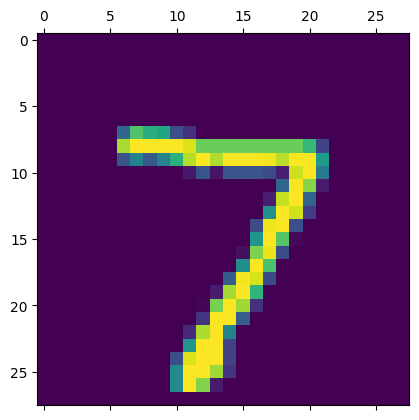

In [177]:
plt.matshow(X_test[0])

In [ ]:
#np.argmax finds a maximum element  from an array and returns the index of it

In [ ]:
y_predicted[1]

array([8.7532505e-02, 9.6150917e-01, 9.9998653e-01, 9.6040803e-01,
       3.6042898e-09, 4.8048463e-01, 1.8753031e-01, 5.0333023e-07,
       9.8700374e-01, 9.0880285e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])
# here 9.9998653e-01 is the max value, it return it's index

np.int64(2)

In [ ]:
y_test[1]
# so index of y_predicted and y_test is same., so our prediction is correct.

np.uint8(2)

In [ ]:
# to calculate confusion matrix, we have to go to entire elements of array of y_predicted.
# then we returns every element's index and store them in y_predicted_labels.
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [180]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
# then we pass (truth, y_predicted_labels) to get confusion matrix
# we can also import confusion matrix from tensorflow
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    8,  918,   15,    8,    5,   13,   11,   42,    4],
       [   2,    0,   18,  921,    1,   24,    2,   10,   24,    8],
       [   1,    1,    4,    2,  920,    0,   10,    4,   10,   30],
       [   9,    2,    1,   36,   11,  770,   15,    6,   35,    7],
       [  11,    3,    6,    1,    7,   13,  913,    2,    2,    0],
       [   1,    5,   21,    8,    7,    1,    0,  946,    2,   37],
       [   5,    6,    6,   22,    9,   21,   10,   11,  876,    8],
       [  11,    7,    1,   12,   29,    5,    0,   18,    7,  919]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

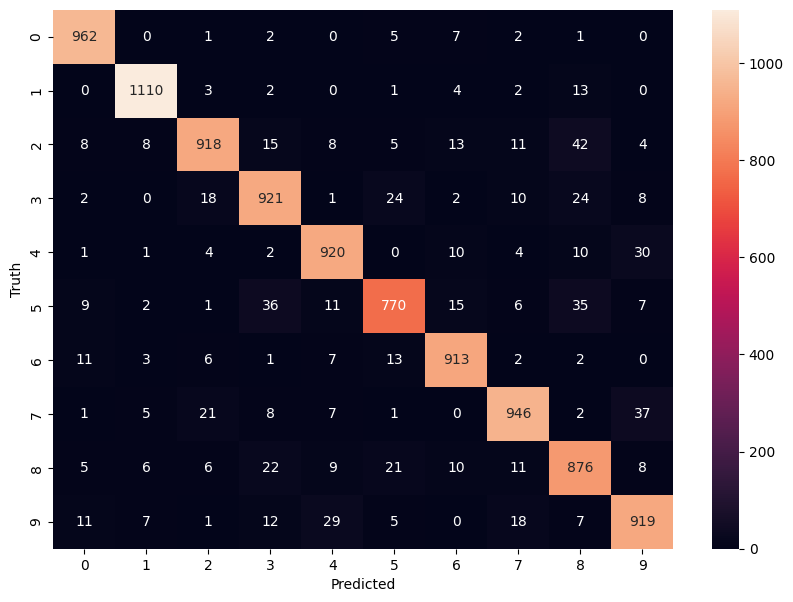

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Using hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9220 - loss: 0.2730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9628 - loss: 0.1264
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0666
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0529


In [ ]:
# after adding hidden layer, my accuaracy increased
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0833


[0.08330054581165314, 0.9743000268936157]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

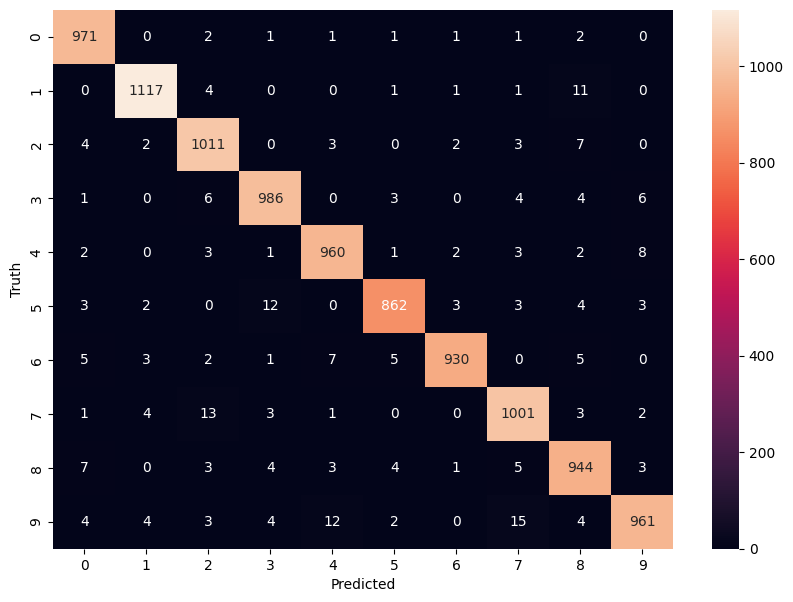

In [ ]:
#plotting confusion matrix again
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flattening the code, this is the input layer
    keras.layers.Dense(100, activation='relu'), # no need to give input shape on this line, this is the hidden layer, (with 100 neurons )
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9244 - loss: 0.2659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9648 - loss: 0.1181
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0824
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9817 - loss: 0.0614
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9842 - loss: 0.0498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9880 - loss: 0.0394
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9899 - loss: 0.0334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0230
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9943 - loss: 0.0187


In [187]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0840


[0.0840480700135231, 0.9772999882698059]

In [ ]:
'''
a) Input Layer
keras.layers.Flatten(input_shape=(28, 28))

input_shape=(28,28) → your input is an image of 28x28 pixels (like MNIST digits).
Flatten layer converts the 2D image into a 1D array of 784 values (28*28 = 784).
This layer does not have neurons with activation, it just reshapes the input.
So input layer size = 28x28 → flattened to 784 features.

b) Hidden Layer
keras.layers.Dense(100, activation='relu')

This is a fully connected (dense) hidden layer with 100 neurons.
Activation function: ReLU (Rectified Linear Unit) → introduces non-linearity.
Each of the 100 neurons receives input from all 784 inputs (from Flatten layer).
So hidden layer size = 100 neurons.

c) Output Layer
keras.layers.Dense(10, activation='sigmoid')

This is the output layer.
Number of neurons = 10 → corresponds to 10 classes (e.g., digits 0–9).
Activation function: sigmoid
So output layer size = 10 neurons.

2.Model Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Optimizer: adam → adjusts weights automatically using gradient descent.
Loss: sparse_categorical_crossentropy → used for multi-class classification where y_train has integer labels (0–9).
Metrics: accuracy → track how often the model predicts the correct class.

3. Model Training
model.fit(X_train, y_train, epochs=10)

During training:
Forward pass: input → hidden → output → compute loss.
Backward pass: adjust weights to reduce loss using Adam optimizer.

'''